# Age Estimation at Death in Individuals Over 50: An Innovative Anthropological Approach

**Explanation of the problem in a simplified manner**

**Introduction:**

    The medicolegal identification of unidentified cadavers involves the use of anthropological methods for estimating age.

**Problem:**

    However, all anthropological methods for estimating age are limited when it comes to estimating the age of individuals over 50 years old.

**Objective:**

    This work proposes an innovative approach to overcome this obstacle.

**Method Principle:**

    The height of a human being decreases after the age of 50. This phenomenon is linked to changes in the vertebral column and is closely related to the decrease in bone density with age. It is also important to note that humans reach their adult height after adolescence, so between the ages of 20 and 40, we have a maximum and stable height.

**Work Steps:**
We operate as follows:

    1.	First Step: In the group of young subjects, we created two simple linear regression models to predict body height. The first model used femur length as a predictor, and the second used spinal column length.
    2.	Second Step: We applied our two previously designed models for young subjects to older individuals. Due to age-related variations mentioned earlier, we observed a discrepancy between the results of the two models.
    3.	Third Step: We incorporated this discrepancy and bone density as independent variables into a third and final regression model, which was intended to be sensitive and specific for age estimation in individuals aged over 50 years.


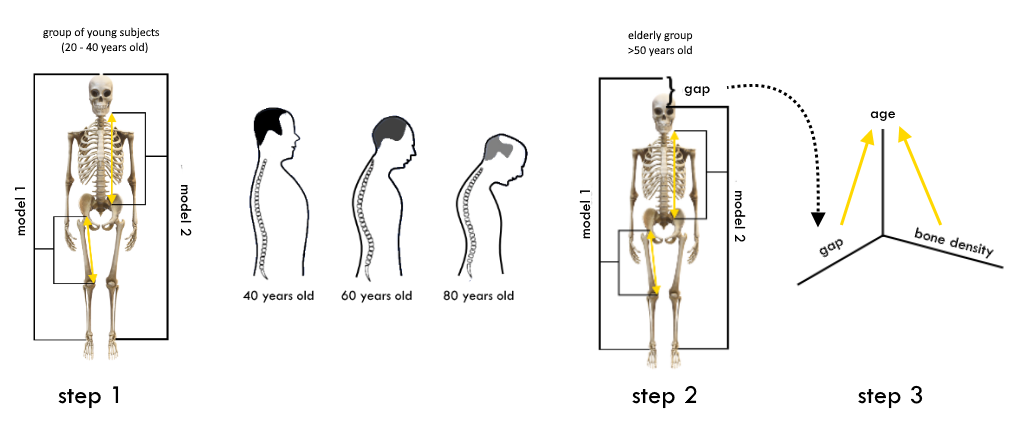

## Version of the libraries used:

In [1]:
import platform
import sklearn
import scipy
import statsmodels
import pingouin
import matplotlib
import seaborn
import plotly
import notebook

print("Version de Jupyter Notebook:", notebook.__version__)
print("Version de Python:", platform.python_version())
print("Version de Scikit-learn:", sklearn.__version__)
print("Version de Scipy:", scipy.__version__)
print("Version de Statsmodels:", statsmodels.__version__)
print("Version de Pingouin:", pingouin.__version__)
print("Version de Matplotlib:", matplotlib.__version__)
print("Version de Seaborn:", seaborn.__version__)
print("Version de Plotly:", plotly.__version__)

Version de Jupyter Notebook: 6.5.3
Version de Python: 3.9.13
Version de Scikit-learn: 1.2.2
Version de Scipy: 1.10.1
Version de Statsmodels: 0.13.5
Version de Pingouin: 0.5.3
Version de Matplotlib: 3.7.1
Version de Seaborn: 0.12.2
Version de Plotly: 5.9.0


## Step 1: Creating 2 Linear Regression Models to Predict Height from Femur Length and Spinal Column Length in a Young Population (20-40 years old)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stat
import sklearn
import pylab

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r'C:\Users\Asus PC\Desktop\travail anthropo\data_base_forsenic_youth.xlsx')

In [4]:
df.head()

ID_patient      cause_de_la_mort  stade_de_decomposition  densite_min  \
0      100309  alcoolisme chronique                       0       201.00   
1      101409          intoxication                       0       207.63   
2      102388               diabète                       0       173.63   
3      102501  alcoolisme chronique                       0       170.13   
4      105586  alcoolisme chronique                       0       233.59   

   taille_corps  taille_femur  taille_colonne  age  
0        182.00         49.91           61.00   37  
1        172.00         43.17           59.32   36  
2        167.00         43.65           55.82   33  
3        177.00         44.89           58.29   40  
4        162.56         44.61           53.16   37

## Descriptive Statistics for the Young Population Database:

In [5]:
df.shape

(44, 8)

### Analysis of the Cause of Death

In [6]:
df['cause_de_la_mort'].describe()

count                     44
unique                    12
top       arythmie cardiaque
freq                      11
Name: cause_de_la_mort, dtype: object

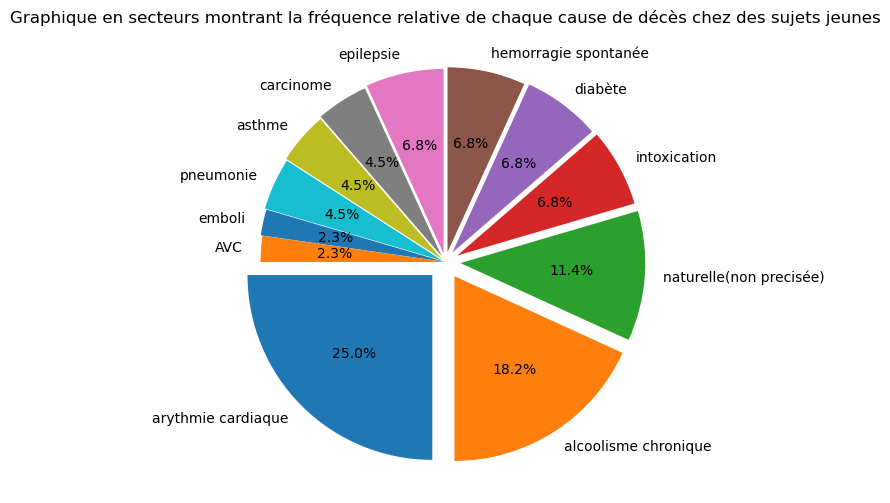

arythmie cardiaque         11
alcoolisme chronique        8
naturelle(non precisée)     5
intoxication                3
diabète                     3
hemorragie spontanée        3
epilepsie                   3
carcinome                   2
asthme                      2
pneumonie                   2
emboli                      1
AVC                         1
Name: cause_de_la_mort, dtype: int64


In [7]:
# Calcul des fréquences relatives en pourcentage
counts = df['cause_de_la_mort'].value_counts()
percentages = counts / len(df) * 100

# Création du diagramme en secteurs
explode = np.linspace(0.1, 0, len(percentages))
plt.figure(figsize=(6,6))
plt.pie(x=percentages, labels=percentages.index, autopct='%1.1f%%', startangle=180, explode=explode)
sns.set_palette("pastel")
plt.title('Graphique en secteurs montrant la fréquence relative de chaque cause de décès chez des sujets jeunes')
plt.show()
print(counts)

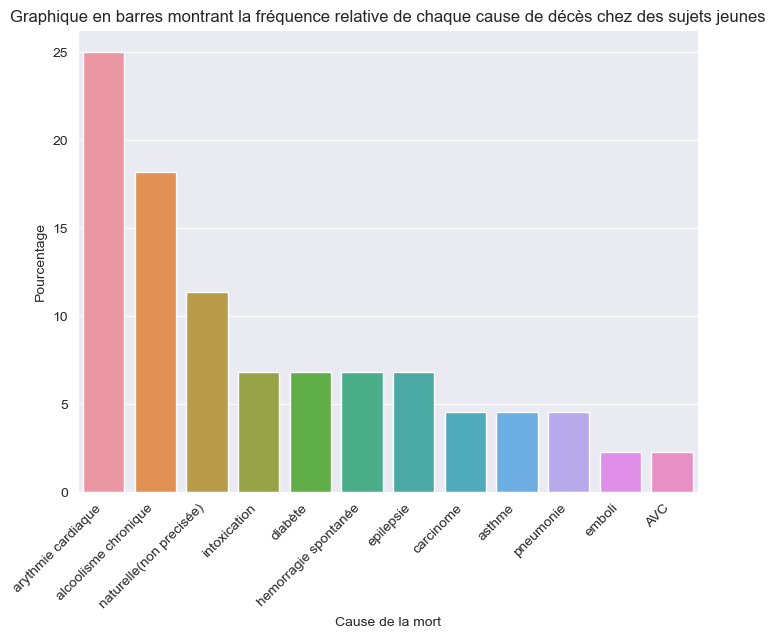

In [8]:
# Création du graphique en barres avec Seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
ax = sns.barplot(x=percentages.index, y=percentages.values)
ax.set(xlabel='Cause de la mort', ylabel='Pourcentage')
plt.xticks(rotation=45, ha='right')
plt.title('Graphique en barres montrant la fréquence relative de chaque cause de décès chez des sujets jeunes')
plt.show()

### Analysis of the Variable: Age

In [9]:
df['age'].describe()

count    44.000000
mean     33.636364
std       5.126724
min      22.000000
25%      30.000000
50%      35.000000
75%      38.000000
max      40.000000
Name: age, dtype: float64

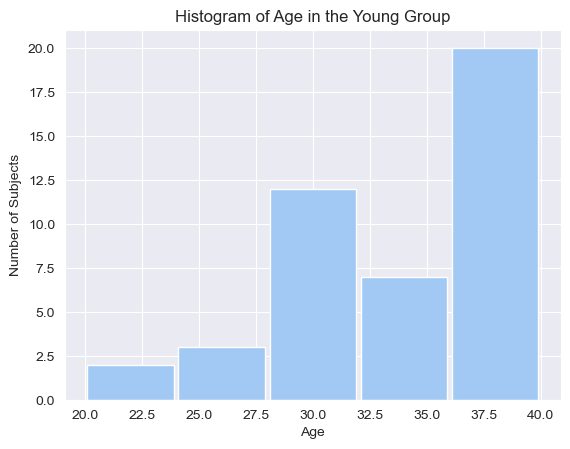

In [10]:
# Histogramme
plt.hist(df['age'],range = (20, 40), bins = 5 
            ,rwidth=0.95)
plt.xlabel('Age')
plt.ylabel('Number of Subjects')
plt.title('Histogram of Age in the Young Group')
plt.show()

### Analysis of the Dependent Variable: Body Height

In [11]:
df['taille_corps'].describe()

count     44.000000
mean     177.435682
std        7.555894
min      162.560000
25%      172.000000
50%      177.400000
75%      182.000000
max      194.000000
Name: taille_corps, dtype: float64

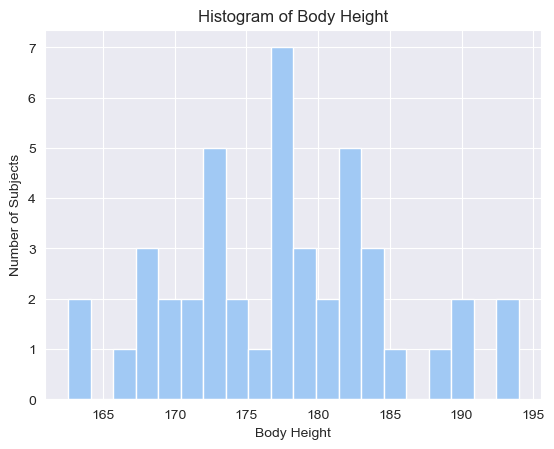

In [12]:
# Histogramme
plt.hist(df['taille_corps'], bins=20)
plt.xlabel('Body Height')
plt.ylabel('Number of Subjects')
plt.title('Histogram of Body Height')
plt.show()

To use the Pearson correlation, it's important to ensure that the variables are normally distributed. To do this, we used the Shapiro-Wilk test.

In [13]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df['taille_corps'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The body height variable follows a normal distribution (p = %f)' % p)
else:
    print('The body height variable does not follow a normal distribution (p = %f)' % p)

The body height variable follows a normal distribution (p = 0.696926)


### Analysis of the Independent Variable: Femur Length

In [14]:
df['taille_femur'].describe()

count    44.000000
mean     46.047500
std       2.453086
min      42.130000
25%      43.987500
50%      45.360000
75%      48.010000
max      51.190000
Name: taille_femur, dtype: float64

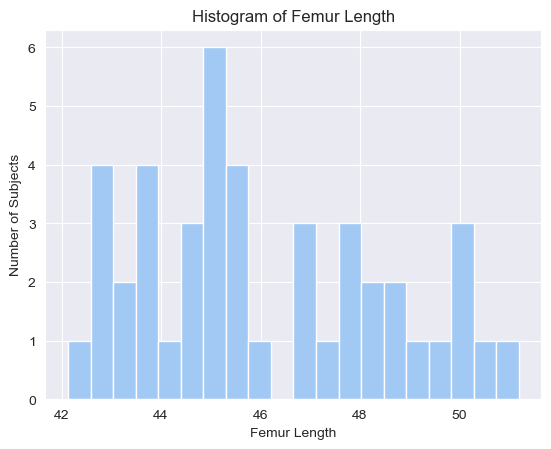

In [15]:
# Histogramme
plt.hist(df['taille_femur'], bins=20)
plt.xlabel('Femur Length')
plt.ylabel('Number of Subjects')
plt.title('Histogram of Femur Length')
plt.show()

In [16]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df['taille_femur'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The femur length variable follows a normal distribution (p = %f)' % p)
else:
    print('The femur length variable does not follow a normal distribution (p = %f)' % p)

The femur length variable follows a normal distribution (p = 0.055632)


In [17]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['taille_femur'], df['taille_corps'])

print("The correlation is: ", corr)
print("The p-value is: ", p_value)

The correlation is:  0.6907553892357858
The p-value is:  2.109638457784339e-07


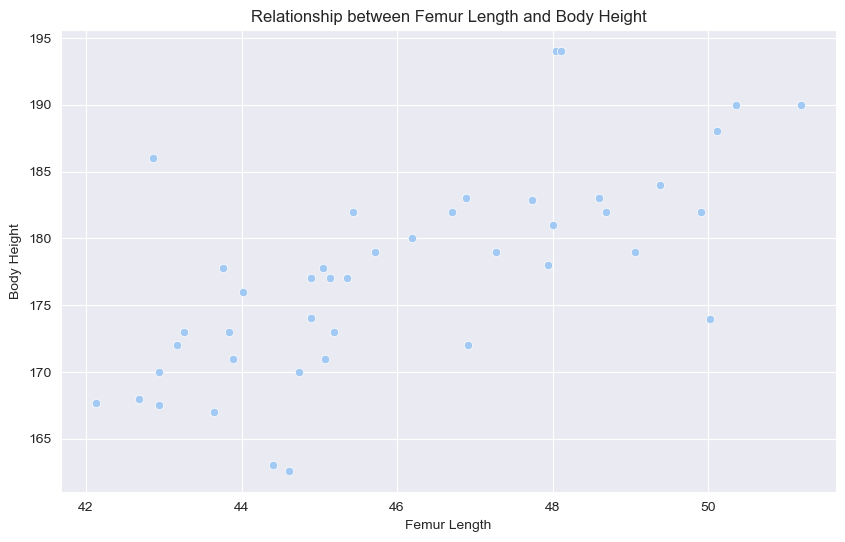

In [18]:
# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='taille_femur', y='taille_corps')
plt.xlabel('Femur Length')
plt.ylabel('Body Height')
plt.title('Relationship between Femur Length and Body Height')
plt.show()

### Outliers
#### In the femur model, we will use the Student's residuals method to detect and eliminate outliers.

In [19]:
df1= df.copy()
x1 = np.array(df1['taille_femur']).reshape(-1, 1)
y1 = np.array(df1['taille_corps']).reshape(-1, 1)

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Créer un modèle de régression linéaire
regression_model = LinearRegression()

# Ajuster le modèle sur les données
regression_model.fit(x1, y1)

# Calculer les prédictions
y_predicted = regression_model.predict(x1)

# Calculer les résidus
residuals = y1 - y_predicted

# Calculer l'estimation de l'erreur standard de la prédiction
std_error = np.std(residuals)

# Calculer la Studentized Residual
studentized_residual = residuals / std_error

# Afficher les valeurs aberrantes
aberrant_mask = np.abs(studentized_residual) > 1.5
aberrant_values = df.loc[aberrant_mask, 'taille_femur']
print(aberrant_values)

4     44.61
8     44.40
13    48.04
26    50.02
29    42.86
32    48.11
Name: taille_femur, dtype: float64


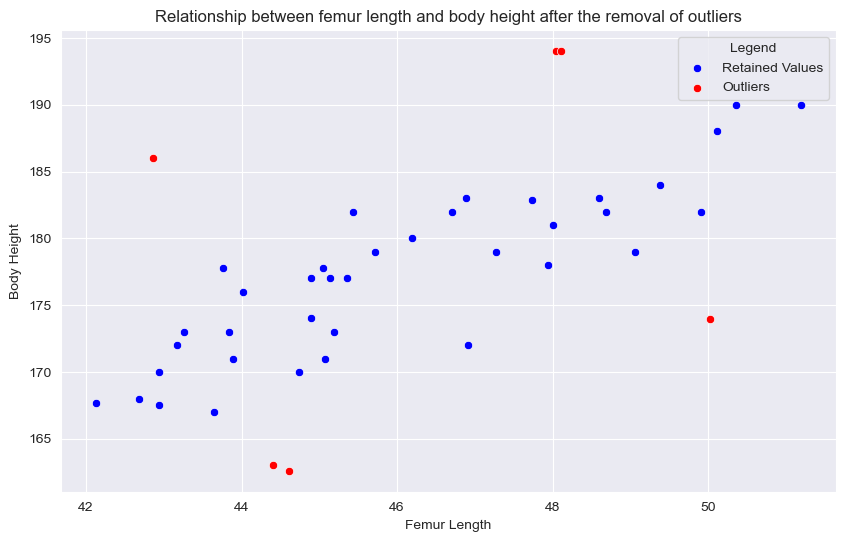

In [21]:
plt.figure(figsize=(10, 6))

# Create a scatter plot for retained data points
sns.scatterplot(data=df1.loc[~aberrant_mask], x='taille_femur', y='taille_corps',color='blue', label='Retained Values')

# Define the outliers in red
aberrant_indices = df1.loc[aberrant_mask].index
sns.scatterplot(data=df1.loc[aberrant_indices], x='taille_femur', y='taille_corps', color='red', label='Outliers')

# Set labels and title
plt.xlabel('Femur Length')
plt.ylabel('Body Height')
plt.title('Relationship between femur length and body height after the removal of outliers')

# Show legend
plt.legend(title='Legend', loc='upper right')

# Show the plot
plt.show()


In [22]:
df1 = df1.drop(aberrant_indices)

In [23]:
# Correlation between femur length and body height after the removal of outliers.
df1['taille_femur'].corr(df1['taille_corps'])

0.8665859896077113

In [24]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df1['taille_femur'], df1['taille_corps'])

print("Correlation is: ", corr)
print("The p-value is: ", p_value)

Correlation is:  0.866585989607711
The p-value is:  2.0499181549087833e-12


### Analysis of the Independent Variable: Spinal Column Length

In [25]:
df['taille_colonne'].describe()

count    44.000000
mean     59.844364
std       2.842770
min      51.650000
25%      58.197500
50%      59.895000
75%      61.670000
max      66.500000
Name: taille_colonne, dtype: float64

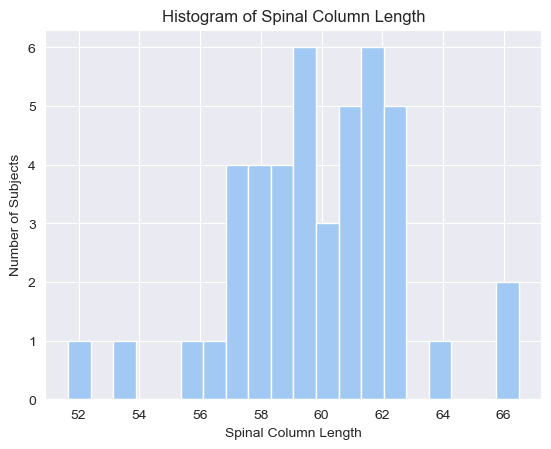

In [26]:
# Histogramme
plt.hist(df['taille_colonne'], bins=20)
plt.xlabel('Spinal Column Length')
plt.ylabel('Number of Subjects')
plt.title('Histogram of Spinal Column Length')
plt.show()

In [27]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df['taille_colonne'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The spinal column length variable follows a normal distribution (p = %f)' % p)
else:
    print('The spinal column length variable does not follow a normal distribution (p = %f)' % p)

The spinal column length variable follows a normal distribution (p = 0.333347)


In [28]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['taille_colonne'], df['taille_corps'])

print("Correlation is: ", corr)
print("The p-value is: ", p_value)

Correlation is:  0.7269596259768587
The p-value is:  2.2987542556804023e-08


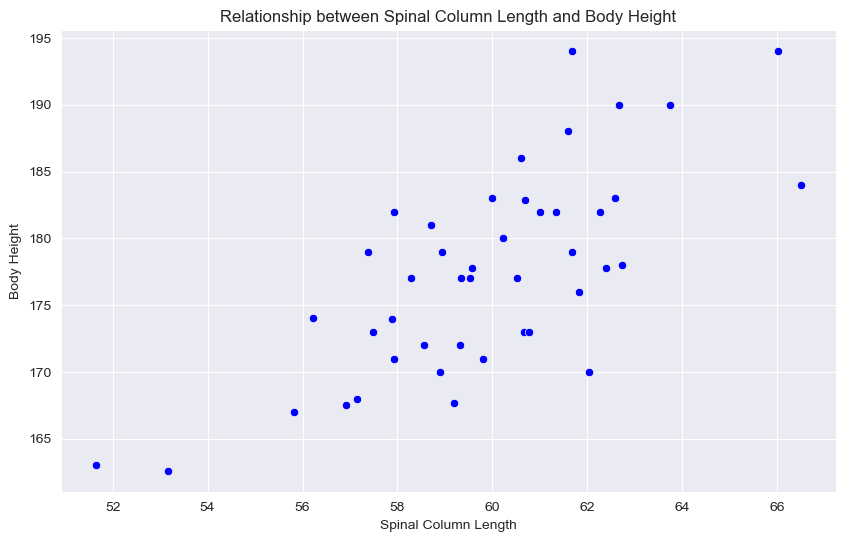

In [29]:
plt.figure(figsize=(10, 6))
# Create a scatter plot
sns.scatterplot(data=df, x='taille_colonne', y='taille_corps',color='blue')

# Set labels and title
plt.xlabel('Spinal Column Length')
plt.ylabel('Body Height')
plt.title('Relationship between Spinal Column Length and Body Height')

# Show the plot
plt.show()

In [30]:
df2 = df.copy()

### extract outliers

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Créer un modèle de régression linéaire
regression_model = LinearRegression()

# Ajuster le modèle sur les données
regression_model.fit(df2[['taille_colonne']], df2['taille_corps'])

# Calculer les prédictions
y_predicted = regression_model.predict(df2[['taille_colonne']])

# Calculer les résidus
residuals = df['taille_corps'] - y_predicted

# Calculer l'estimation de l'erreur standard de la prédiction
std_error = np.std(residuals)

# Calculer la Studentized Residual
studentized_residual = residuals / std_error

# Afficher les valeurs aberrantes
aberrant_mask = np.abs(studentized_residual) > 1
aberrant_values = df.loc[aberrant_mask, 'taille_colonne']
print(len(aberrant_values))

16


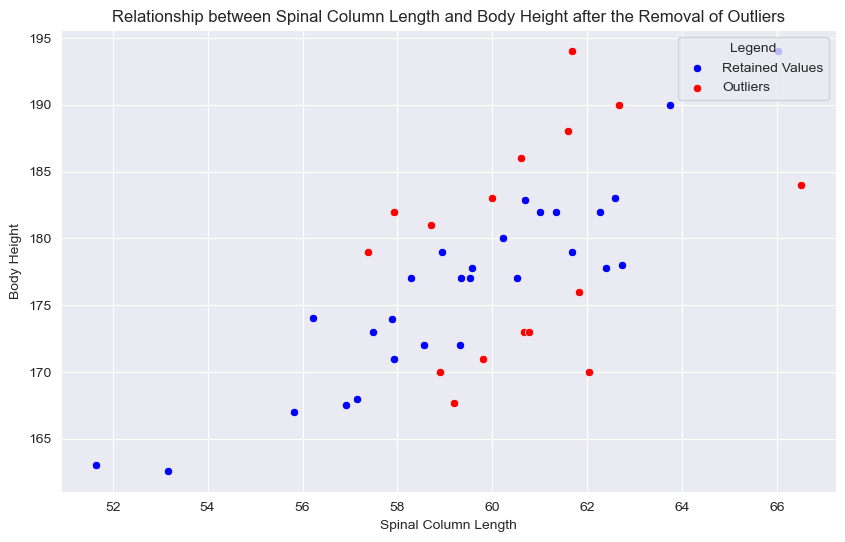

In [32]:
plt.figure(figsize=(10, 6))
# Create a scatter plot for retained data points
sns.scatterplot(data=df2.loc[~aberrant_mask], x='taille_colonne', y='taille_corps',color='blue', label='Retained Values')

# Define the outliers in red
aberrant_indices = df2.loc[aberrant_mask].index
sns.scatterplot(data=df2.loc[aberrant_indices], x='taille_colonne', y='taille_corps', color='red', label='Outliers')

# Set labels and title
plt.xlabel('Spinal Column Length')
plt.ylabel('Body Height')
plt.title('Relationship between Spinal Column Length and Body Height after the Removal of Outliers')

# Show legend
plt.legend(title='Legend', loc='upper right')

# Show the plot
plt.show()


In [33]:
df2 = df2.drop(aberrant_indices)

In [34]:
df2['taille_colonne'].corr(df2['taille_corps'])

0.914162549226591

In [35]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df2['taille_colonne'], df2['taille_corps'])

print("Correlation is: ", corr)
print("The p-value is: ", p_value)

Correlation is:  0.9141625492265915
The p-value is:  1.0709680513400647e-11


## Regression Model Femur Length - Body Height

In [36]:
x1 = np.array(df1['taille_femur']).reshape(-1, 1)
y1 = np.array(df1['taille_corps']).reshape(-1, 1)

In [37]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=1/3, random_state=1)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
std_slc = StandardScaler()
reg = LinearRegression()
pipe = Pipeline(steps=[("std_slc", std_slc),  
                           ("reg", reg)])
fit_intercept= [True, False]
copy_X =[True, False]
positive= [True, False]
parameters = dict(  reg__copy_X=copy_X,
                      reg__fit_intercept=fit_intercept,
                        reg__positive=positive)

grid_femur = GridSearchCV(pipe, parameters)
grid_femur.fit(x_train1, y_train1)
print(grid_femur.score(x_test1,y_test1))
grid_femur = grid_femur.best_estimator_

0.7951333481853143


In [39]:
print(grid_femur)

Pipeline(steps=[('std_slc', StandardScaler()),
                ('reg', LinearRegression(positive=True))])


In [40]:
# # sauvgarder le modele
# import joblib

# # Sauvegarder le meilleur estimateur (modèle complet avec la pipeline)
# joblib.dump(grid_femur, 'modele_femur.joblib')

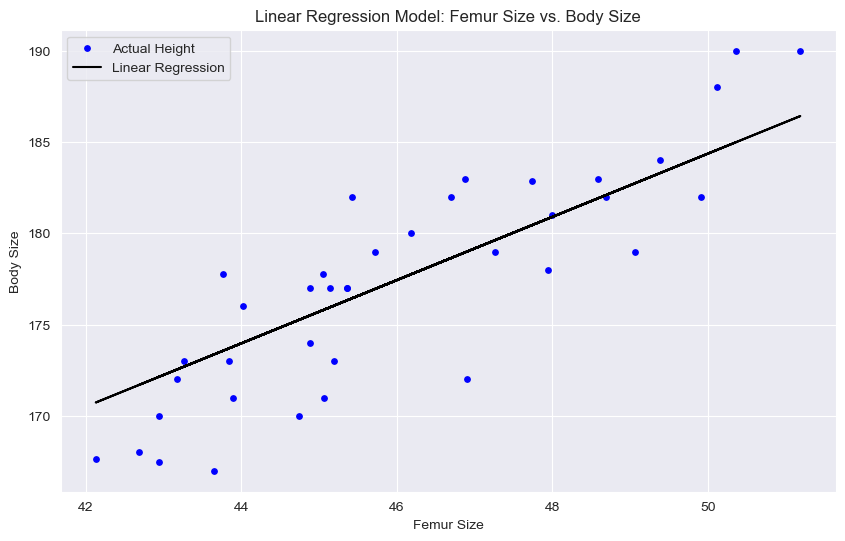

In [41]:
import matplotlib.pyplot as plt
# Données
x = df1['taille_femur']
y_actual = df1['taille_corps']
df1['y_pred'] = y_pred = grid_femur.predict(x1)

# Créer la figure et les axes
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Tracer les points réels en bleu
plt.scatter(x, y_actual, c='blue', label='Actual Height', s=15)

# Tracer la ligne de régression en noir
plt.plot(x, y_pred, c='black', label='Linear Regression')

# Paramètres du graphique
plt.title('Linear Regression Model: Femur Size vs. Body Size')
plt.xlabel('Femur Size')
plt.ylabel('Body Size')
plt.grid(True)

# Légendes en anglais
plt.legend(loc='upper left')
plt.show()


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Faire des prédictions sur les données de test
y_pred = grid_femur.predict(x_test1)

# Calculer différentes métriques de performance
mse = mean_squared_error(y_test1, y_pred)
mae = mean_absolute_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
# Afficher les résultats
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))
print("R2 score: {:.2f}".format(r2))

MSE: 11.80
MAE: 3.03
R2 score: 0.80


In [43]:
CV_Result = cross_val_score(grid_femur,x_test1, y_test1, cv=4, n_jobs=-1, scoring="r2")
print(CV_Result)
print("%0.2f accuracy with a standard deviation of %0.2f" % (CV_Result.mean(), CV_Result.std()))

[0.78893704 0.8529081  0.96837134 0.88146246]
0.87 accuracy with a standard deviation of 0.06


In [44]:
# Extraire le modèle LinearRegression de la pipeline grid_femur
reg_final = grid_femur.named_steps["reg"]

# Extraire le coef_ et l'intercept
coef = reg_final.coef_
intercept = reg_final.intercept_

print("Coef_:", coef)
print("Intercept:", intercept)

Coef_: [[3.82609614]]
Intercept: [177.8992]


## Regression Model Spinal Column Length - Body Height

In [45]:
x2 = np.array(df2['taille_colonne']).reshape(-1, 1)
y2 = np.array(df2['taille_corps']).reshape(-1, 1)

In [46]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=1/3, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

std_slc = StandardScaler()
poly2 = PolynomialFeatures()
reg = LinearRegression()
pipe = Pipeline(steps=[("std_slc", std_slc),  
                       #("poly2",poly2),
                           ("reg", reg)])
fit_intercept= [True, False]
copy_X =[True, False]
positive= [True, False]
n_degree=[1,2,3,4,5]
parameters = dict( #poly2__degree=n_degree,
                    reg__copy_X=copy_X,
                      reg__fit_intercept=fit_intercept,
                        reg__positive=positive)

grid_colonne = GridSearchCV(pipe, parameters)
grid_colonne.fit(x_train2, y_train2)
print(grid_colonne.score(x_train2, y_train2))
grid_colonne = grid_colonne.best_estimator_

0.7725355569124713


In [48]:
grid_colonne

Pipeline(steps=[('std_slc', StandardScaler()),
                ('reg', LinearRegression(positive=True))])

In [49]:
# # sauvgarder le modele colonne
# import joblib

# # Sauvegarder le meilleur estimateur (modèle complet avec la pipeline)
# joblib.dump(grid_colonne, 'modele_colonne.joblib')

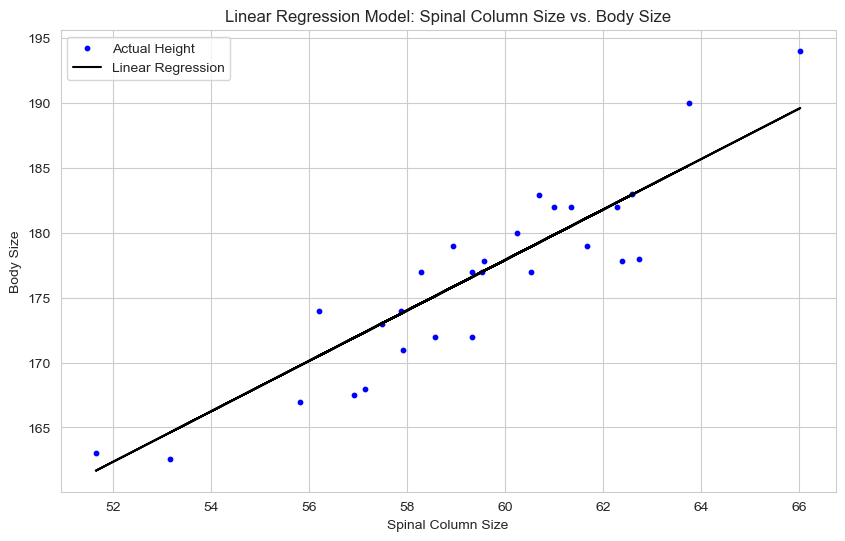

In [50]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  # Set background to whit
# Données
x = df2['taille_colonne']
y_actual = df2['taille_corps']
df2['y_pred'] = y_pred2 = grid_colonne.predict(x2)

# Créer la figure et les axes
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Tracer les points réels en bleu
plt.scatter(x, y_actual, c='blue', label='Actual Height', s=10)

# Tracer la ligne de régression en noir
plt.plot(x, y_pred2, c='black', label='Linear Regression')

# Paramètres du graphique
plt.title('Linear Regression Model: Spinal Column Size vs. Body Size')
plt.xlabel('Spinal Column Size')
plt.ylabel('Body Size')
plt.grid(True)

# Légendes en anglais
plt.legend(loc='upper left')
plt.show()


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred2 = grid_colonne.predict(x_test2)
# Calculer différentes métriques de performance
mse = mean_squared_error(y_test2, y_pred2)
mae = mean_absolute_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)
# Afficher les résultats
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))
print("R2 score: {:.2f}".format(r2))

MSE: 6.47
MAE: 2.04
R2 score: 0.89


In [52]:
CV_Result = cross_val_score(grid_colonne,x_test2, y_test2, cv=4, n_jobs=-1, scoring="r2")
print(CV_Result)
print("%0.2f accuracy with a standard deviation of %0.2f" % (CV_Result.mean(), CV_Result.std()))

[0.86398117 0.82785169 0.96774507 0.76357994]
0.86 accuracy with a standard deviation of 0.07


In [53]:
# Extraire le modèle LinearRegression de la pipeline grid_femur
reg_final = grid_colonne.named_steps["reg"]

# Extraire le coef_ et l'intercept
coef = reg_final.coef_
intercept = reg_final.intercept_

print("Coef_:", coef)
print("Intercept:", intercept)

Coef_: [[5.79979248]]
Intercept: [175.52944444]


# Descriptive Statistics, Part 2: Database of Elderly Subjects (>50 years)

In [54]:
df3 = pd.read_excel(r'C:\Users\Asus PC\Desktop\travail anthropo\data_base_forsenic_eldery.xlsx')
df3.head()

ID_patient sexe       cause_de_la_mort  stade_de_decomposition  \
0      100065    M                 sepsis                       0   
1      100137    M               asphyxie                       0   
2      100155    M                emboli                        0   
3      100359    M  detresse respiratoire                       0   
4      100366    M              naturelle                       0   

   taille_corps  taille_femur  taille_colonne    D_L1    D_L2    D_L3    D_L4  \
0        174.00         45.86           56.54  194.14  203.57  189.00  171.84   
1        172.72         49.70           61.43  137.58  122.32  113.21  126.05   
2           NaN         45.10           61.60  140.45  164.43  174.83  191.56   
3           NaN         47.06           59.72  128.16  127.41  123.57  141.89   
4        187.00         48.37           58.09  120.97  111.51  124.59  122.22   

   age  
0   66  
1   65  
2   60  
3   68  
4   65

In [55]:
df3.shape

(107, 12)

In [56]:
df3['height_by_femur'] = grid_femur.predict(np.array(df3['taille_femur']).reshape(-1,1))
df3['height_by_spine'] = grid_colonne.predict(np.array(df3['taille_colonne']).reshape(-1,1))

df3['densite_min'] = np.array(df3[['D_L1','D_L2','D_L3','D_L4']].min(axis=1)).reshape(-1,1)

df3['diff'] = df3['height_by_femur'] - df3['height_by_spine']

In [57]:
df3.head()

ID_patient sexe       cause_de_la_mort  stade_de_decomposition  \
0      100065    M                 sepsis                       0   
1      100137    M               asphyxie                       0   
2      100155    M                emboli                        0   
3      100359    M  detresse respiratoire                       0   
4      100366    M              naturelle                       0   

   taille_corps  taille_femur  taille_colonne    D_L1    D_L2    D_L3    D_L4  \
0        174.00         45.86           56.54  194.14  203.57  189.00  171.84   
1        172.72         49.70           61.43  137.58  122.32  113.21  126.05   
2           NaN         45.10           61.60  140.45  164.43  174.83  191.56   
3           NaN         47.06           59.72  128.16  127.41  123.57  141.89   
4        187.00         48.37           58.09  120.97  111.51  124.59  122.22   

   age  height_by_femur  height_by_spine  densite_min      diff  
0   66       177.193442       171.172358       171.84  6.021084  
1   65       183.842389       180.671782       113.21  3.170608  
2   60       175.877504       181.002027       140.45 -5.124523  
3   68       179.271238       177.349897       123.57  1.921341  
4   65       181.539499       174.183423       111.51  7.356076

### Distribution of the Cause of Death in Elderly Subjects

In [58]:
df3['cause_de_la_mort'].describe()

count                    107
unique                    17
top       arythmie cardiaque
freq                      47
Name: cause_de_la_mort, dtype: object

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul des fréquences relatives en pourcentage
counts = df3['cause_de_la_mort'].value_counts()
percentages = counts / len(df3) * 100

print(counts)

arythmie cardiaque        47
Pneumonie                  9
hypertension               9
naturelle                  7
carcinome                  6
sepsis                     5
detresse respiratoire      4
anevrysme                  4
hemorragie                 3
AVC                        3
emboli                     2
insuffisance hepatique     2
BPCO                       2
iatrogene                  1
insuffisance renale        1
asphyxie                   1
parkinson                  1
Name: cause_de_la_mort, dtype: int64


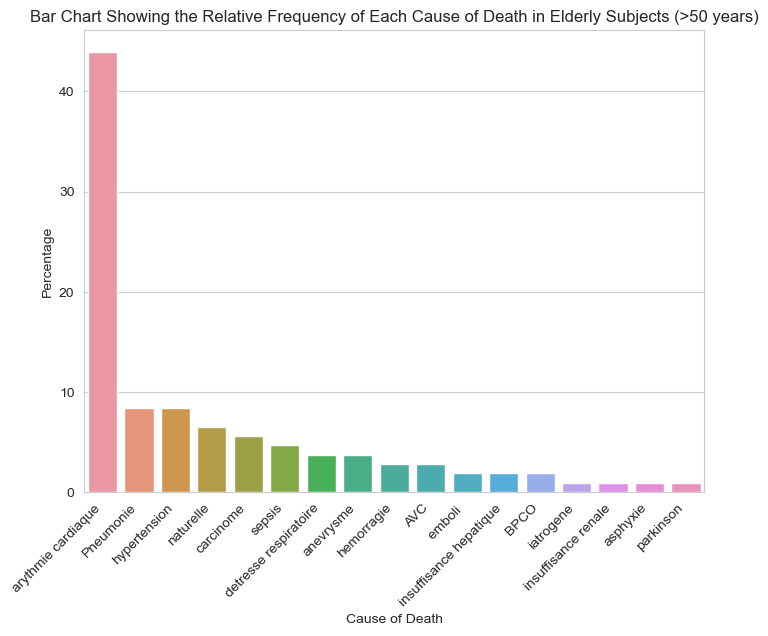

In [60]:
# Création du graphique en barres avec Seaborn
plt.figure(figsize=(8,6))
ax = sns.barplot(x=percentages.index, y=percentages.values)
ax.set(xlabel='Cause of Death', ylabel='Percentage')
plt.xticks(rotation=45, ha='right')
plt.title('Bar Chart Showing the Relative Frequency of Each Cause of Death in Elderly Subjects (>50 years)')
plt.show()

### Analysis of the Dependent Variable: Age

In [61]:
df3['age'].describe()

count    107.000000
mean      70.112150
std        8.620212
min       53.000000
25%       64.000000
50%       70.000000
75%       75.000000
max       90.000000
Name: age, dtype: float64

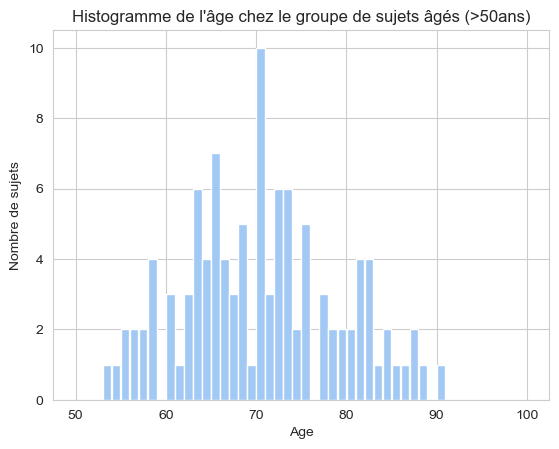

In [62]:
# Histogramme
plt.hist(df3['age'],range = (50, 100), bins = 50 
            ,rwidth=0.95)
plt.xlabel('Age')
plt.ylabel('Nombre de sujets')
plt.title('Histogramme de l\'âge chez le groupe de sujets âgés (>50ans)')
plt.show()

In [63]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df3['age'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The "age" variable follows a normal distribution (p = %f)' % p)
else:
    print('The "age" variable does not follow a normal distribution (p = %f)' % p)

The "age" variable follows a normal distribution (p = 0.187690)


## Description of the variable "height of the elderly subject."

In [64]:
df3['taille_corps'].describe()

count    100.000000
mean     176.911500
std        8.353878
min      148.590000
25%      171.875000
50%      177.000000
75%      182.000000
max      203.000000
Name: taille_corps, dtype: float64

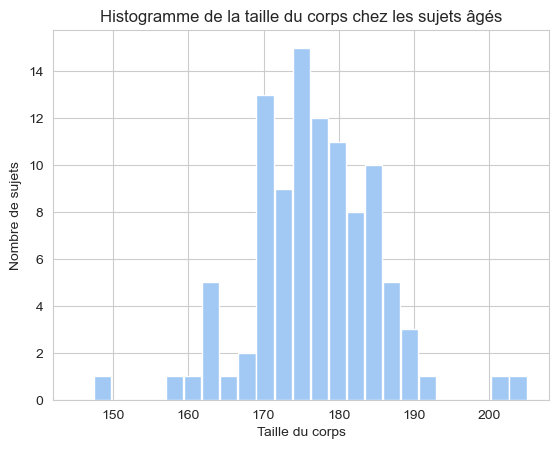

In [65]:
# Histogramme
plt.hist(df3['taille_corps'],range = (145, 205), bins = 25 
            ,rwidth=0.95)
plt.xlabel('Taille du corps')
plt.ylabel('Nombre de sujets')
plt.title('Histogramme de la taille du corps chez les sujets âgés')
plt.show()

## Description of the dependent variable "height of the elderly subject predicted from femur length."

In [66]:
df3['height_by_femur'].describe()

count    107.000000
mean     178.559706
std        4.432109
min      166.821777
25%      175.635095
50%      178.145765
75%      181.219172
max      193.261731
Name: height_by_femur, dtype: float64

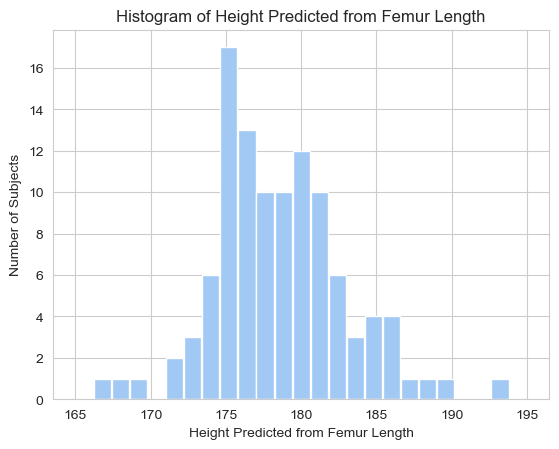

In [67]:
# Histogramme
plt.hist(df3['height_by_femur'],range = (165, 195), bins = 25 
            ,rwidth=0.95)
plt.xlabel('Height Predicted from Femur Length')
plt.ylabel('Number of Subjects')
plt.title('Histogram of Height Predicted from Femur Length')
plt.show()

In [68]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df3['height_by_femur'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The "height_by_femur" variable follows a normal distribution (p = %f)' % p)
else:
    print('The "height_by_femur" variable does not follow a normal distribution (p = %f)' % p)

The "height_by_femur" variable follows a normal distribution (p = 0.101810)


## Description of the variable "height of the elderly subject predicted from spinal column length."

In [69]:
df3['height_by_spine'].describe()

count    107.000000
mean     175.344094
std        5.294001
min      165.111377
25%      171.279203
50%      175.174160
75%      179.039979
max      187.004731
Name: height_by_spine, dtype: float64

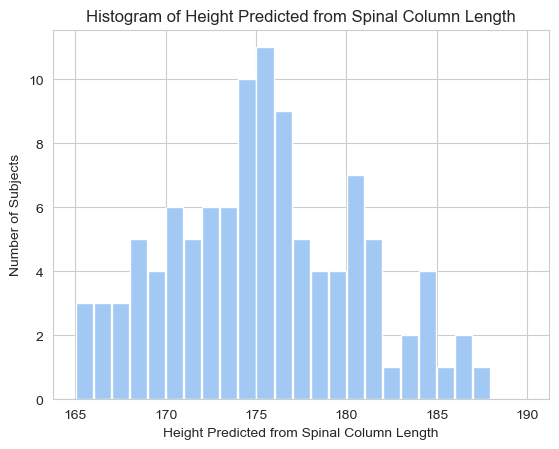

In [70]:
# Histogramme
plt.hist(df3['height_by_spine'],range = (165, 190), bins = 25 
            ,rwidth=0.95)
plt.xlabel('Height Predicted from Spinal Column Length')
plt.ylabel('Number of Subjects')
plt.title('Histogram of Height Predicted from Spinal Column Length')
plt.show()

In [71]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df3['height_by_spine'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The "height_by_spine" variable follows a normal distribution (p = %f)' % p)
else:
    print('The "height_by_spine" variable does not follow a normal distribution (p = %f)' % p)

The "height_by_spine" variable follows a normal distribution (p = 0.212396)


## Comparison of actual height with heights predicted from femur length and spinal column length:

In [72]:
import numpy as np

# Calcul des moyennes et des écarts-types
mean_taille = np.mean(df3['taille_corps'])
std_taille = np.std(df3['taille_corps'])

mean_height_by_femur = np.mean(df3['height_by_femur'])
std_height_by_femur = np.std(df3['height_by_femur'])

mean_height_by_spine = np.mean(df3['height_by_spine'])
std_height_by_spine = np.std(df3['height_by_spine'])

In [73]:
print("Mean of actual height: ", mean_taille, " Standard Deviation: ", std_taille)
print("Mean of height predicted from femur length: ", mean_height_by_femur, " Standard Deviation: ", std_height_by_femur)
print("Mean of height predicted from spinal column length: ", mean_height_by_spine, " Standard Deviation: ", std_height_by_spine)

Mean of actual height:  176.91150000000002  Standard Deviation:  8.312003534046411
Mean of height predicted from femur length:  178.55970611426042  Standard Deviation:  4.411349847236763
Mean of height predicted from spinal column length:  175.34409446799174  Standard Deviation:  5.26920450913715


This table displays the average of the three heights. These results suggest that the height predicted from the femur size is greater than the actual height, while the height predicted from the spinal column size is smaller, in accordance with the effect of spinal column shortening with age.

##  Comparison of actual height with heights predicted from femur length and spinal column length based on age.

In [74]:
df4 = df3.dropna(subset=['taille_corps'])

In [75]:
# grouper les données par âge et calculer les moyennes pour chaque groupe
means_by_age = df4.groupby('age')[['taille_corps', 'height_by_femur', 'height_by_spine']].mean()

df4['age_interval'] = pd.cut(df4['age'], bins=range(50, 101, 5))
df4_means = df4.groupby('age_interval').mean()[['taille_corps', 'height_by_femur', 'height_by_spine']]

In [76]:
# Calcul de la moyenne et de l'écart type pour chaque variable dans chaque groupe
df4_means_std = df4.groupby('age_interval').agg({'taille_corps': ['mean', 'std'], 
                                              'height_by_femur': ['mean', 'std'], 
                                              'height_by_spine': ['mean', 'std']})

# Renommer les colonnes pour refléter les moyennes et les écarts types
df4_means_std.columns = ['taille_corps_mean', 'taille_corps_std', 
                     'height_by_femur_mean', 'height_by_femur_std', 
                     'height_by_spine_mean', 'height_by_spine_std']

# Afficher le résultat
df4_means_std

taille_corps_mean  taille_corps_std  height_by_femur_mean  \
age_interval                                                              
(50, 55]             176.995000          7.041901            176.487857   
(55, 60]             178.713333          6.571499            178.744093   
(60, 65]             175.744000          6.639057            176.736327   
(65, 70]             177.247273          7.915907            178.311831   
(70, 75]             177.515000          9.729082            179.169080   
(75, 80]             179.984444         11.320564            180.648740   
(80, 85]             174.576364          5.336260            178.547158   
(85, 90]             173.986000         14.990520            181.632999   
(90, 95]                    NaN               NaN                   NaN   
(95, 100]                   NaN               NaN                   NaN   

              height_by_femur_std  height_by_spine_mean  height_by_spine_std  
age_interval                                                                  
(50, 55]                 6.791108            173.493792             3.960552  
(55, 60]                 3.050558            177.300253             6.344819  
(60, 65]                 3.680074            176.097877             5.157343  
(65, 70]                 4.464447            175.279239             5.148658  
(70, 75]                 4.890877            174.823517             6.004324  
(75, 80]                 5.922226            176.100144             3.765569  
(80, 85]                 3.975283            173.590040             4.493587  
(85, 90]                 4.490299            175.310144             7.361962  
(90, 95]                      NaN                   NaN                  NaN  
(95, 100]                     NaN                   NaN                  NaN

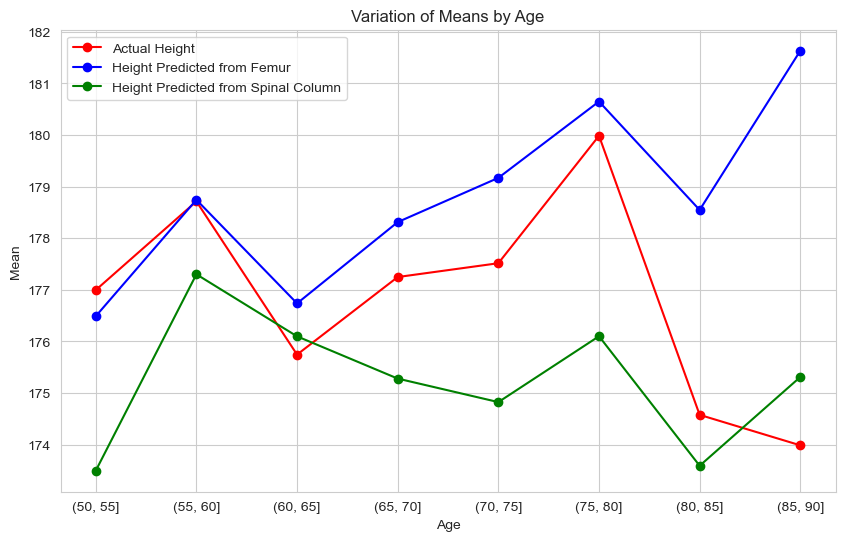

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns


df4['age_interval'] = pd.cut(df4['age'], bins=range(50, 101, 5))
df4_means = df4.groupby('age_interval').mean()[['taille_corps', 'height_by_femur', 'height_by_spine']]

# Calcul de la moyenne et de l'écart type pour chaque variable dans chaque groupe
df4_means = df4.groupby('age_interval').agg({'taille_corps': ['mean'], 
                                              'height_by_femur': ['mean'], 
                                              'height_by_spine': ['mean']})



plt.figure(figsize=(10,6))

# Lignes pour les moyennes de la taille réelle, du fémur et de la colonne vertébrale
age_intervals_str = [str(interval) for interval in df4_means.index]
plt.plot(age_intervals_str, df4_means['taille_corps']['mean'], label='Actual Height', marker='o', color='red')
plt.plot(age_intervals_str, df4_means['height_by_femur']['mean'], label='Height Predicted from Femur', marker='o', color='blue')
plt.plot(age_intervals_str, df4_means['height_by_spine']['mean'], label='Height Predicted from Spinal Column', marker='o', color='green')

plt.xlabel('Age')
plt.ylabel('Mean')
plt.title('Variation of Means by Age')
plt.legend()
plt.show()

This figure provides a linear representation of the average heights in 5-year age groups. We can observe that the height predicted from the femur is consistently greater than that predicted from the spinal column, but the actual height is not always centered between the two. This could be explained by various factors, such as data quality issues or statistical variations.

# Creating the Regression Model to Predict Age in Elderly Subjects:

In [78]:
# importer la base de donnée
df3 = pd.read_excel(r'C:\Users\Asus PC\Desktop\travail anthropo\data_base_forsenic_eldery.xlsx')
df3.head()

ID_patient sexe       cause_de_la_mort  stade_de_decomposition  \
0      100065    M                 sepsis                       0   
1      100137    M               asphyxie                       0   
2      100155    M                emboli                        0   
3      100359    M  detresse respiratoire                       0   
4      100366    M              naturelle                       0   

   taille_corps  taille_femur  taille_colonne    D_L1    D_L2    D_L3    D_L4  \
0        174.00         45.86           56.54  194.14  203.57  189.00  171.84   
1        172.72         49.70           61.43  137.58  122.32  113.21  126.05   
2           NaN         45.10           61.60  140.45  164.43  174.83  191.56   
3           NaN         47.06           59.72  128.16  127.41  123.57  141.89   
4        187.00         48.37           58.09  120.97  111.51  124.59  122.22   

   age  
0   66  
1   65  
2   60  
3   68  
4   65

In [79]:
# création de nouvelles variables
df3['height_by_femur'] = grid_femur.predict(np.array(df3['taille_femur']).reshape(-1,1))
df3['height_by_spine'] = grid_colonne.predict(np.array(df3['taille_colonne']).reshape(-1,1))

df3['densite_min'] = np.array(df3[['D_L1','D_L2','D_L3','D_L4']].min(axis=1)).reshape(-1,1)

df3['diff'] = df3['height_by_femur'] - df3['height_by_spine']

### Study of the distribution and symmetry of the variables.

### ==> minimum density

In [80]:
df3['densite_min'].describe()

count    107.000000
mean     121.714393
std       40.362878
min       46.610000
25%       91.150000
50%      121.490000
75%      151.180000
max      213.730000
Name: densite_min, dtype: float64

In [81]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df3['densite_min'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The "minimum density" variable follows a normal distribution (p = %f)' % p)
else:
    print('The "minimum density" variable does not follow a normal distribution (p = %f)' % p)

The "minimum density" variable follows a normal distribution (p = 0.051569)


In [82]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df3['densite_min'], df3['age'])

print("The correlation is: ", corr)
print("The p-value is: ", p_value)

The correlation is:  -0.7678175766268366
The p-value is:  4.997783558385846e-22


The skewness of df3['densite_min'] is: 0.22


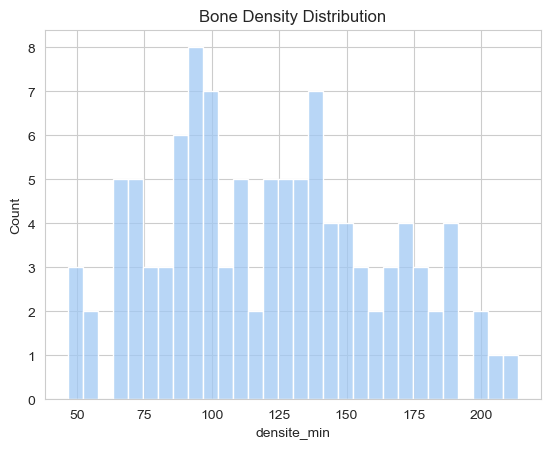

In [83]:
# afficher l'histogramme de df3['densite_min']
sns.histplot(data=df3, x='densite_min', bins=30)
# calculer la mesure d'asymétrie de df3['densite_min']
skewness = pd.Series(df3['densite_min']).skew()
# Ajouter un titre
plt.title('Bone Density Distribution')

print(f"The skewness of df3['densite_min'] is: {skewness:.2f}")

In [84]:
# transformation racine carré de la variable:
df3['densite_min'] =np.sqrt(df3['densite_min'])

The skewness of df3['densite_min'] after transformation is: -0.08


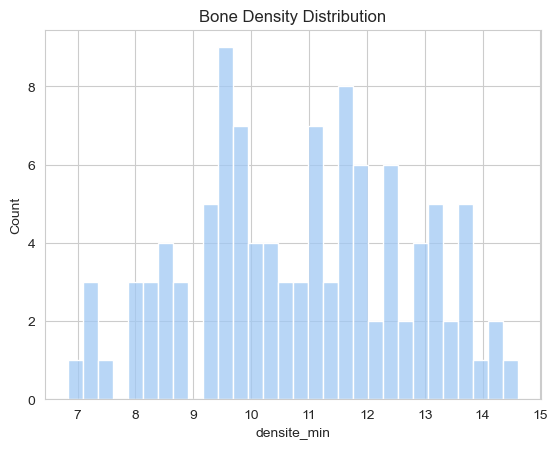

In [85]:
#analyse de la variable aprés transformation:
# afficher l'histogramme de df3['densite_min']
sns.histplot(data=df3, x='densite_min', bins=30)
# calculer la mesure d'asymétrie de df3['densite_min']
skewness = pd.Series(df3['densite_min']).skew()

plt.title('Bone Density Distribution')

print(f"The skewness of df3['densite_min'] after transformation is: {skewness:.2f}")

### ==> discrepancy

In [86]:
df3['diff'].describe()

count    107.000000
mean       3.215612
std        5.261403
min      -11.312207
25%        0.340792
50%        3.374868
75%        6.423338
max       13.986367
Name: diff, dtype: float64

The skewness measure of df3['diff'] is: -0.10


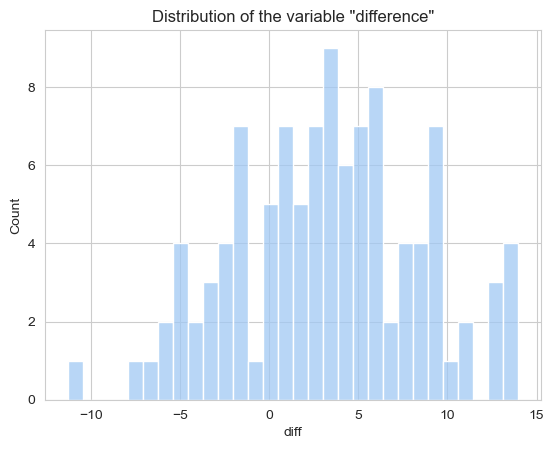

In [87]:
# afficher l'histogramme de diff
sns.histplot(data=df3, x='diff', bins=30)
# calculer la mesure d'asymétrie de df3['densite_min']
skewness = pd.Series(df3['diff']).skew()
# Ajouter un titre
plt.title('Distribution of the variable "difference"')

print(f"The skewness measure of df3['diff'] is: {skewness:.2f}")

In [88]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(df3['diff'])

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The "diff" variable follows a normal distribution (p = %f)' % p)
else:
    print('The "diff" variable does not follow a normal distribution (p = %f)' % p)

The "diff" variable follows a normal distribution (p = 0.731783)


Following the analysis of the distribution of the variable "difference" and the measurement of skewness (skewness = -0.10), an asymmetry in the variable was observed. To normalize the distribution and improve the performance of regression models, a Box-Cox transformation was applied to the variable. However, due to the presence of negative values in the variable, it was necessary to shift the values by adding the absolute value of the minimum value before applying the transformation.

In [89]:
min_diff_abs = abs(df3['diff'].min())
print(min_diff_abs)

11.312206782011515


In [90]:
# transformation de la variable "diff"
from scipy.stats import boxcox

#df3['diff'] = df3['diff'] + min_diff_abs+1
df3['diff'] = df3['diff'] + 100
df3['diff'],parametre = boxcox(df3['diff'])

### Retrieving the lambda parameter of the Box-Cox function to apply this transformation to new values.

In [91]:
parametre

1.6619518970309919

La mesure d'asymétrie de df3['diff'] est de : -0.01


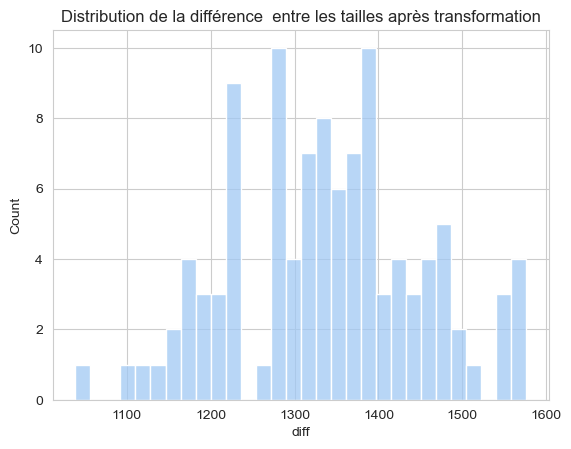

In [92]:
# afficher l'histogramme de diff
sns.histplot(data=df3, x='diff', bins=30)
# calculer la mesure d'asymétrie de df3['densite_min']
skewness = pd.Series(df3['diff']).skew()
# Ajouter un titre
plt.title('Distribution de la différence  entre les tailles après transformation')

print(f"La mesure d'asymétrie de df3['diff'] est de : {skewness:.2f}")

## Removal of Outlier Values

In [93]:
# Checking the Correlation Between Variables Before Removing Outlier Values
corr_matrix = df3[['age', 'densite_min', 'diff']].corr()
corr_matrix

age  densite_min      diff
age          1.000000    -0.776409  0.279808
densite_min -0.776409     1.000000 -0.159220
diff         0.279808    -0.159220  1.000000

In [94]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df3['densite_min'], df3['age'])

print("La corrélation est : ", corr)
print("La p-value est : ", p_value)

La corrélation est :  -0.7764093726794344
La p-value est :  8.808654372165068e-23


In [95]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df3['diff'], df3['age'])

print("Correlation is: ", corr)
print("The p-value is: ", p_value)

Correlation is:  0.2798075060260795
The p-value is:  0.0035127353076482176


In [96]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge

X = df3[['densite_min', 'diff']]
y = df3['age']

# Créer un modèle de régression linéaire
regression_model = Ridge()
# Ajuster le modèle sur les données
regression_model.fit(X, y)
# Calculer les prédictions
y_predicted = regression_model.predict(X)
# Calculer les résidus
residuals = y - y_predicted
# Calculer l'estimation de l'erreur standard de la prédiction
std_error = np.std(residuals)
# Calculer la Studentized Residual
studentized_residual = residuals / std_error
# Afficher les valeurs aberrantes
aberrant_mask = np.abs(studentized_residual) > 1.49
aberrant_values = df3.loc[aberrant_mask, 'age']
print('taille: ',len(aberrant_values))

taille:  15


In [97]:
aberrant_indices = df3.loc[aberrant_mask].index
# Suppression des outliers de df3
df3_clean = df3.drop(aberrant_indices)
# Vérification que les outliers ont bien été supprimés
print(df3_clean.shape)

(92, 16)


In [98]:
# Rechecking the Correlation After the Removal of Outlier Values.
corr_matrix_clean = df3_clean[['age', 'densite_min', 'diff']].corr()
corr_matrix_clean

age  densite_min      diff
age          1.000000    -0.855529  0.307799
densite_min -0.855529     1.000000 -0.218822
diff         0.307799    -0.218822  1.000000

In [99]:
corr, p_value = pearsonr(df3_clean['densite_min'], df3_clean['age'])

print("La corrélation est : ", corr)
print("La p-value est : ", p_value)

La corrélation est :  -0.8555293844551333
La p-value est :  1.8230402159996758e-27


In [100]:
corr, p_value = pearsonr(df3_clean['diff'], df3_clean['age'])

print("Correlation is: ", corr)
print("The p-value is: ", p_value)

Correlation is:  0.3077993043977026
The p-value is:  0.0028379916481597123


### Displaying Data in Three Dimensions.

In [101]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(
    x=df3_clean['diff'],
    y=df3_clean['densite_min'],
    z=df3_clean['age'],
    mode='markers',
    marker=dict(
        size=5,
        color=df3_clean['age'],
        colorscale='Viridis',
        opacity=0.8
    ),
     hovertext=df3_clean.index
)])

fig.update_layout(scene=dict(
        xaxis_title='Diff',
        yaxis_title='Densite_min',
        zaxis_title='Age'
    ),
    scene_camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.5, y=1.5, z=1.5)),
    uirevision=True)

fig.show()

## Creation of the Final Model

In [102]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df3_clean[['diff','densite_min']]
y=df3_clean['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
std_slc = StandardScaler(with_mean=False)
ridge = linear_model.Ridge()
poly = PolynomialFeatures()
pca = decomposition.PCA()
pipe = Pipeline(steps=[ ("std_slc", std_slc),
                       # ("pca", pca),
                        #("poly",poly),
                        ("ridge", ridge)])
solver = ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
n_components = list(range(1,X.shape[1]+1,1))
n_degree=[1,2,3]
parameters = dict(#pca__n_components=n_components,
                     # poly__degree=n_degree,
                      ridge__solver=solver,
                        ridge__alpha=alphas)

In [103]:
corr, p_value = pearsonr(df3_clean['diff'], df3_clean['densite_min'])
print("Correlation is: ", corr)
print("The p-value is: ", p_value)

Correlation is:  -0.21882247052156173
The p-value is:  0.03611380767244797


In [104]:
ridge_GS = GridSearchCV(pipe, parameters,cv=4)
ridge_GS.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('std_slc',
                                        StandardScaler(with_mean=False)),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-1...
       1.72258597e-03, 1.88965234e-03, 2.07292178e-03, 2.27396575e-03,
       2.49450814e-03, 2.73644000e-03, 3.00183581e-03, 3.29297126e-03,
       3.61234270e-03, 3.96268864e-03, 4.34701316e-03, 4.76861170e-03,
       5.23109931e-03, 5.73844165e-03, 6.29498899e-03, 6.90551352e-03,
       7.57525026e-03, 8.30994195e-03, 9.11588830e-03, 1.00000000e-02]),
                         'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                           'sparse_cg', 'sag', 'saga']})

In [105]:
modelRidge = ridge_GS.best_estimator_
print(modelRidge)

Pipeline(steps=[('std_slc', StandardScaler(with_mean=False)),
                ('ridge', Ridge(alpha=2.899422853882875e-06, solver='saga'))])


## learning Curve

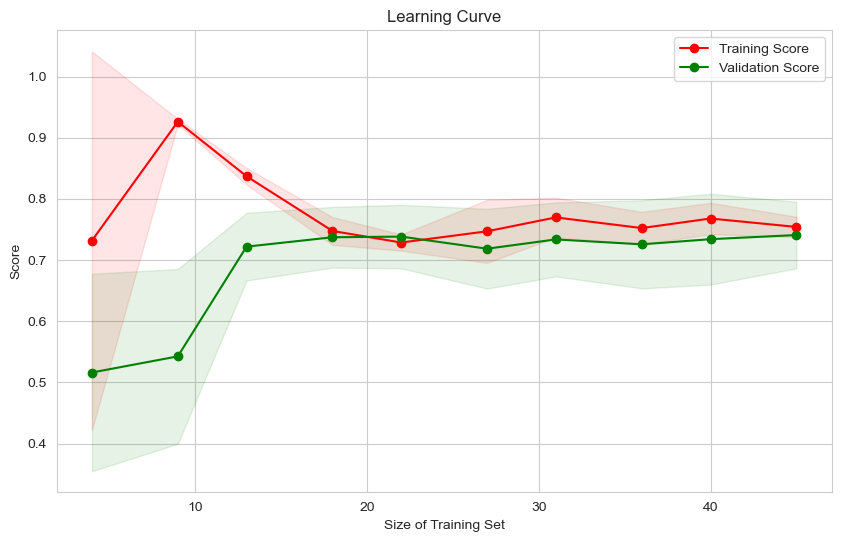

In [106]:
from sklearn.model_selection import learning_curve

# Définir les tailles de l'ensemble d'apprentissage (divisez votre jeu de données en plusieurs tailles)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculer les scores d'apprentissage et de validation croisée en utilisant learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    modelRidge, X_train, y_train, train_sizes=train_sizes, cv=4)

# Calculer les scores moyens et les écart-types pour l'ensemble d'apprentissage et de validation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Créer une figure pour afficher la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Size of Training Set")
plt.ylabel("Score")
plt.grid(True)

# Afficher les scores moyens d'apprentissage et de validation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Validation Score")

# Afficher la légende
plt.legend(loc="best")

# Afficher la courbe d'apprentissage
plt.show()

the learning curve of the model, which displays the determination score of the training data as well as the test data in relation to the sample size. It is evident from the convergence of both curves that the model is free from overfitting and underfitting issues.

In [107]:
# # sauvgarder le modele colonne
# import joblib

# # Sauvegarder le meilleur estimateur (modèle complet avec la pipeline)
# joblib.dump(modelRidge, 'modele_age.joblib')

In [108]:
# Extraire le modèle LinearRegression de la pipeline grid_femur
reg_final = modelRidge.named_steps["ridge"]

# Extraire le coef_ et l'intercept
coef = reg_final.coef_
intercept = reg_final.intercept_

print("Coef_:", coef)
print("Intercept:", intercept)

Coef_: [ 1.14787194 -7.41400195]
Intercept: 98.11511907394869


## Displaying the model

In [109]:
# Créer une grille de coordonnées dans l'espace 3D
x_vals = np.linspace(df3_clean['diff'].min(), df3_clean['diff'].max(), 50)
y_vals = np.linspace(df3_clean['densite_min'].min(), df3_clean['densite_min'].max(), 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)

# Calculer les prédictions pour chaque point de la grille
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        Z[j,i] = modelRidge.predict([[X[j,i], Y[j,i]]])

# Tracer la surface correspondante
fig.add_trace(go.Surface(x=X, y=Y, z=Z, opacity=0.5))

fig.update_layout(scene=dict(
        xaxis_title='Diff',
        yaxis_title='Densite_min',
        zaxis_title='Age'
    ))

fig.show()

In [110]:
# chemin_fichier_excel = r'C:\Users\Asus PC\Downloads/df_for_graph.xlsx'

# # Sauvegarder la DataFrame dans un fichier Excel
# df_for_graph.to_excel(chemin_fichier_excel, index=False)

In [111]:
from sklearn.metrics import *

y_hat = modelRidge.predict(X_test)

print("R-squared (R2) determination score is: ", end="")
print("{0:.2f}".format(modelRidge.score(X_test, y_test)))

print("Mean Absolute Error (MAE) is: ", end="")
print("{0:.2f}".format(mean_absolute_error(y_test, y_hat)))

print("Median Absolute Error is: ",  end="" )
print("{0:.2f}".format(median_absolute_error(y_test, y_hat)))

print("Root Mean Squared Error (RMSE) is: ", end="") 
print("{0:.2f}".format(np.sqrt(mean_squared_error(y_test, y_hat))))

print("Mean Squared Error (MSE) is: ", end="")
print("{0:.2f}".format(mean_squared_error(y_test, y_hat)))

print("Maximum Error is: ", end="")
print("{0:.2f}".format(max_error(y_test, y_hat)))

print(f"Mean Absolute Percentage Error: "f"{mean_absolute_percentage_error(y_test, y_hat) * 100:.3f} %")


R-squared (R2) determination score is: 0.73
Mean Absolute Error (MAE) is: 3.94
Median Absolute Error is: 4.33
Root Mean Squared Error (RMSE) is: 4.42
Mean Squared Error (MSE) is: 19.54
Maximum Error is: 8.69
Mean Absolute Percentage Error: 5.730 %


In [112]:
CV_Result = cross_val_score(modelRidge, X_test, y_test, cv=4, n_jobs=-1, scoring="r2")
print(CV_Result)
print("%0.2f accuracy with a standard deviation of %0.2f" % (CV_Result.mean(), CV_Result.std()))

[0.59554734 0.70456214 0.61786523 0.78430231]
0.68 accuracy with a standard deviation of 0.07


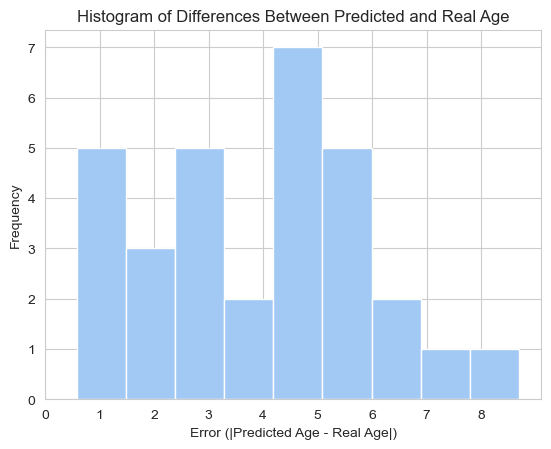

In [113]:
import matplotlib.pyplot as plt

err_hist = np.abs(y_test - y_hat)
plt.hist(err_hist, bins=int(max_error(y_test, y_hat)) + 1)
plt.xticks(np.arange(0, int(max_error(y_test, y_hat)) + 1, 1))
# plt.title("Histogramme des différences entre l'âge prédit et l'âge réel")
# plt.xlabel("Erreur (|âge prédit - âge réel|)")
# plt.ylabel("Fréquence")
plt.title("Histogram of Differences Between Predicted and Real Age")
plt.xlabel("Error (|Predicted Age - Real Age|)")
plt.ylabel("Frequency")
plt.show()

This figure shows the histogram of absolute errors between the model's predicted values and the actual values of the dependent variable on the test data. The horizontal axis represents the absolute error values, while the vertical axis represents the frequency of occurrence of these errors.

In [114]:
import pandas as pd

# Créez un DataFrame avec les valeurs prédites et les valeurs réelles
results = pd.DataFrame({'Âge Prédit': y_hat, 'Âge Réel': y_test})

results

Âge Prédit  Âge Réel
45    64.166291        62
25    82.151729        83
63    61.090098        68
86    77.332047        73
0     61.558044        66
29    64.640717        62
44    62.090889        57
78    66.057323        71
10    73.581416        73
49    57.445033        60
97    72.080028        75
40    62.539161        64
104   77.533350        82
73    76.118067        73
13    80.101895        79
4     71.762548        65
20    60.696138        56
31    56.313589        58
55    67.052942        65
76    71.081243        77
16    75.408567        82
80    61.309764        70
92    64.974765        70
35    64.614083        60
38    66.704827        61
11    55.041028        54
77    79.765723        85
81    72.697658        70
36    73.944068        70
91    75.362992        81
9     64.828419        69

We need to ensure the normality of the distribution of predicted values before using the parametric Student's t-test to compare the predicted and actual values

In [115]:
from scipy.stats import shapiro

# effectuer un test de Shapiro-Wilk sur y_hat
stat, p = shapiro(y_hat)

# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('The variable y_hat follows a normal distribution (p = %f)' % p)
else:
    print('The variable y_hat does not follow a normal distribution (p = %f)')

The variable y_hat follows a normal distribution (p = 0.286478)


In [116]:
from scipy.stats import ttest_rel

# effectuer un test t de Student sur y_test et y_hat
stat, p = ttest_rel(y_test, y_hat)
# Affichage des résultats
print("Statistique de test t : {:.4f}".format(stat))
print("p-valeur associée : {:.4f}".format(p))
# interprétation des résultats
alpha = 0.05
if p > alpha:
    print('There is no significant difference between y_test and y_hat (p = %f)' % p)
else:
    print('There is a significant difference between y_test and y_hat (p = %f)' % p)

Statistique de test t : 0.8475
p-valeur associée : 0.4034
There is no significant difference between y_test and y_hat (p = 0.403420)


## Residual Analysis:

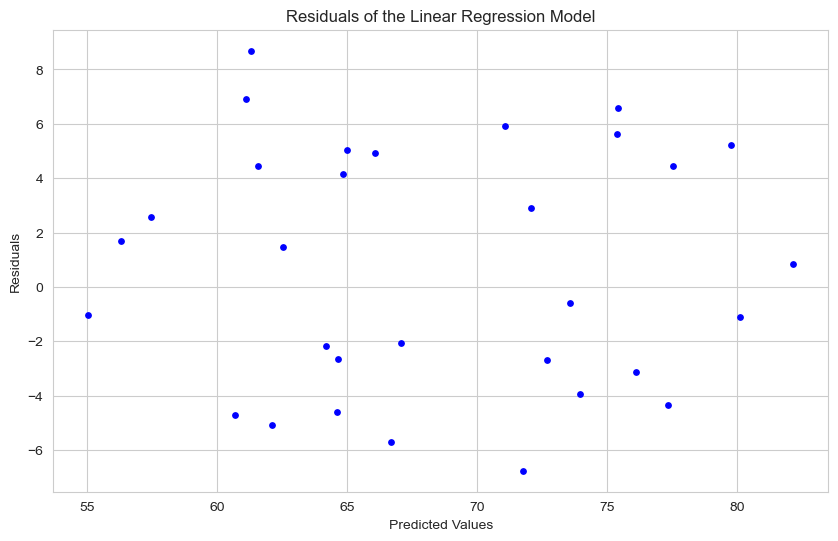

In [117]:
# Calculer les résidus
residus = y_test - y_hat

# Tracer les résidus avec une taille de points plus petite (par exemple, s=20)
plt.figure(figsize=(10, 6))
plt.scatter(y_hat.flatten(), residus.to_numpy().flatten(), color='blue', s=15)
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True,)
plt.show()


The residual plot shows a random distribution of residuals around zero. This means that the residuals are evenly distributed throughout the prediction range and do not exhibit any clear trends, patterns, or visible structures. We also conducted the Shapiro-Wilk test on the residuals, and the test's p-value was 0.10. Therefore, we can accept the null hypothesis and conclude that the residuals follow a normal distribution.

In [118]:
# Test de normalité
from scipy.stats import shapiro
stat, p = shapiro(residus)
print(p)
alpha = 0.05
if p > alpha:
    print('La distribution des résidus semble gaussienne (fail to reject H0)')
else:
    print('La distribution des résidus ne semble pas gaussienne (reject H0)')

0.10774309933185577
La distribution des résidus semble gaussienne (fail to reject H0)


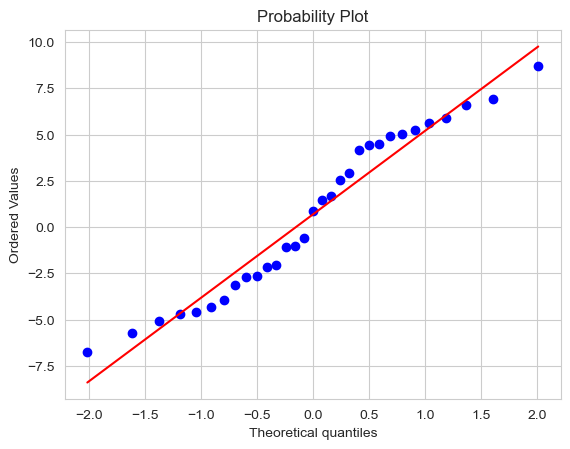

In [119]:
from scipy import stats


stats.probplot(residus, dist='norm', plot=pylab)
plt.show()

# Comparison of the Mean Absolute Error between Lamendin's Method and Our Method

In [120]:
# Ajouter une colonne 'age_group' au dataframe de test en fonction de l'âge
bins = [50, 65, 80, float('inf')]
labels = ['51-65', '66-80', '>81']
X_test['age_group'] = pd.cut(y_test, bins=bins, labels=labels)

# Calculer le MAE pour chaque groupe d'âge
mae_by_age_group = {}
for age_group in labels:
    y_test_group = y_test[X_test['age_group'] == age_group]
    y_hat_group = y_hat[X_test['age_group'] == age_group]
    mae_by_age_group[age_group] = mean_absolute_error(y_test_group, y_hat_group)
    
# Afficher les résultats
mae_by_age_group

{'51-65': 3.372639898603668,
 '66-80': 4.199676282786149,
 '>81': 4.555527839149346}

|Age Group	| Mean Absolute Error for Lamendin's Method  |	Mean Absolute Error for Our Method|
| --- | --- | --- |
|G1 (<35)	|   16.06                                    |	          -
|G2 (36-50)  | 	5.24                                     |	          -
|G3 (51-65)  |	10.74	                                 | 3.37
|G4 (66-80)  |	19.37	                                 |4.19
|G5 (>81)	|   32.54	                                 |4.55


# Application of the Model to the Young Subject Data:

In [121]:
# importation de la base de donnée
df4 = pd.read_excel(r'C:\Users\Asus PC\Desktop\travail anthropo\data_base_forsenic_youth.xlsx')
df4.head()

ID_patient      cause_de_la_mort  stade_de_decomposition  densite_min  \
0      100309  alcoolisme chronique                       0       201.00   
1      101409          intoxication                       0       207.63   
2      102388               diabète                       0       173.63   
3      102501  alcoolisme chronique                       0       170.13   
4      105586  alcoolisme chronique                       0       233.59   

   taille_corps  taille_femur  taille_colonne  age  
0        182.00         49.91           61.00   37  
1        172.00         43.17           59.32   36  
2        167.00         43.65           55.82   33  
3        177.00         44.89           58.29   40  
4        162.56         44.61           53.16   37

### creation des variables: 

In [122]:
df4['height_by_femur'] = grid_femur.predict(np.array(df4['taille_femur']).reshape(-1,1))
df4['height_by_spine'] = grid_colonne.predict(np.array(df4['taille_colonne']).reshape(-1,1))

df4['diff'] = df4['height_by_femur'] - df4['height_by_spine']

### transformation des variables

In [123]:
df4['diff'] = df4['diff'] + 100  

fitted_lambda=1.6619518970309919
df4['diff'] = (df4['diff']**fitted_lambda - 1) / fitted_lambda
df4['densite_min'] = np.sqrt(df4['densite_min']) 

In [124]:
# Utiliser le modèle pour prédire l'âge des sujets jeunes
predictions_young = modelRidge.predict(df4[['diff', 'densite_min']])

# Calculer le R² pour évaluer la performance du modèle sur les sujets jeunes
from sklearn.metrics import r2_score
r2_young = r2_score(df4['age'], predictions_young)

# Afficher le R² obtenu
print("R² pour les sujets jeunes :", r2_young)

R² pour les sujets jeunes : -23.1753815951484


We attempted to apply the model to the group of young subjects (aged 20 to 40 years) to assess its specificity. The coefficient of determination R² obtained for this group of young subjects was -23.18.

# In this chart, we can observe the variation in prediction based on the simultaneous variation of the two independent variables.

In [125]:
import pandas as pd
import plotly.express as px

# Supposons que vous ayez déjà votre modèle et votre DataFrame df3_clean

# Créez une grille de valeurs pour 'diff' et 'densite_min'
diff_values = range(int(df3_clean['diff'].min()), int(df3_clean['diff'].max()) + 1)
densite_min_values = range(int(df3_clean['densite_min'].min()), int(df3_clean['densite_min'].max()) + 1)

# Créez une liste vide pour stocker les prédictions d'âge
age_predictions = []

# Parcourez les valeurs de 'diff' et 'densite_min' pour prédire l'âge
for diff in diff_values:
    for densite_min in densite_min_values:
        # Utilisez votre modèle pour prédire l'âge ici (remplacez ceci par votre code)
        age_predicted = modelRidge.predict([[diff, densite_min]])[0]
        age_predictions.append(age_predicted)

# Créez un DataFrame pour les prédictions
predictions_df = pd.DataFrame({'diff': [diff for diff in diff_values for densite_min in densite_min_values],
                               'densite_min': [densite_min for diff in diff_values for densite_min in densite_min_values],
                               'age_predicted': age_predictions})

# Créez un graphique interactif avec Plotly
fig = px.scatter_3d(predictions_df, x='diff', y='densite_min', z='age_predicted',
                     labels={'diff': 'diff', 'densite_min': 'densite_min', 'age_predicted': 'Âge Prédit'})

# Affichez le graphique interactif
fig.show()


# Interpretation of Results

The results indicate that our regression model is well-fitted to the data, and the predictions it generates do not significantly differ from the actual values. Furthermore, it demonstrates that the model is free from both overfitting and underfitting. The analysis of residuals serves as a reliable indicator of the model's quality. This suggests that the prediction model is appropriate for the data, and prediction errors are not systematic. It also implies that the forecasts are accurate, and there is no significant bias in the predictions.
The coefficient of determination R² obtained for the group of young subjects was -23.18. A negative R² suggests that the model is unable to explain the variation in the data, indicating a lack of model fit for this group. This observation demonstrates that our model is not only sensitive to the data of older subjects but also specific to this demographic group. This specificity reinforces our initial hypothesis and methodology, which focused on modeling age-related characteristics in older subjects.
